<a href="https://colab.research.google.com/github/PedroReste/data-visualization-with-economics-data/blob/main/Notebooks/data_visualization_with_economics_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libriries and data from GitHub
https://github.com/PedroReste/data-visualization-with-economics-data

In [223]:
#Importing all libriries necessaries to do the visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [224]:
#Importind the bases from Github. Link:https://github.com/PedroReste/data-visualization-with-economics-data
gdp_annual_variation = 'https://raw.githubusercontent.com/PedroReste/data-visualization-with-economics-data/main/Databases/gdp_growth_annual_percentage.csv'
gdp_per_capita_annual_variation = 'https://raw.githubusercontent.com/PedroReste/data-visualization-with-economics-data/main/Databases/gdp_per_capita_growth_annual_percentage.csv'
inflation_annual_variation = 'https://raw.githubusercontent.com/PedroReste/data-visualization-with-economics-data/main/Databases/inflation_consumer_prices_annual_percentage.csv'

gdp_current_dolar = 'https://raw.githubusercontent.com/PedroReste/data-visualization-with-economics-data/main/Databases/gdp_current_dolar.csv'

gdp_annual_variation = pd.read_csv(gdp_annual_variation, sep=',')
gdp_per_capita_annual_variation = pd.read_csv(gdp_per_capita_annual_variation, sep=',')
inflation_annual_variation = pd.read_csv(inflation_annual_variation, sep=',')

gdp_current_dolar = pd.read_csv(gdp_current_dolar, sep=',')

#Data Treament

In [225]:
#The columns Country Name and Country Code are objects.
#we gonna change to strings for filter only the countries we want in the graphs
#gdp.dtypes

In [226]:
#Creating new columns in all datasets to change the object columns to string columns
gdp_annual_variation['Country'] = gdp_annual_variation['Country Name'].convert_dtypes(str)
gdp_annual_variation['Code'] = gdp_annual_variation['Country Code'].convert_dtypes(str)

gdp_per_capita_annual_variation['Country'] = gdp_per_capita_annual_variation['Country Name'].convert_dtypes(str)
gdp_per_capita_annual_variation['Code'] = gdp_per_capita_annual_variation['Country Code'].convert_dtypes(str)

inflation_annual_variation['Country'] = inflation_annual_variation['Country Name'].convert_dtypes(str)
inflation_annual_variation['Code'] = inflation_annual_variation['Country Code'].convert_dtypes(str)

gdp_current_dolar['Country'] = gdp_current_dolar['Country Name'].convert_dtypes(str)
gdp_current_dolar['Code'] = gdp_current_dolar['Country Code'].convert_dtypes(str)

In [227]:
#Droping columns relateds of indicator name and code, and a column without information.
#Droping too the object columns
drop_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66']

gdp_annual_variation = gdp_annual_variation.drop(columns= drop_columns)
gdp_per_capita_annual_variation = gdp_per_capita_annual_variation.drop(columns= drop_columns)
inflation_annual_variation = inflation_annual_variation.drop(columns= drop_columns)
gdp_current_dolar = gdp_current_dolar.drop(columns= drop_columns)

In [228]:
#Reorder the columns by Country and Code, after that, by all years in dataset
list_of_columns = ['Country', 'Code']

for i in range(1960, 2022):
  list_of_columns.append(str(i))

gdp_annual_variation = gdp_annual_variation[list_of_columns]
gdp_per_capita_annual_variation = gdp_per_capita_annual_variation[list_of_columns]
inflation_annual_variation = inflation_annual_variation[list_of_columns]
gdp_current_dolar = gdp_current_dolar[list_of_columns]

In [229]:
#Divided GDP value per 1 billion to better data visualizatiom
gdp_current_dolar.iloc[:,2:] = gdp_current_dolar.iloc[:,2:] / 1000000000

In [230]:
#Rounding percentages for better data visualization
gdp_annual_variation = gdp_annual_variation.round(2)
gdp_per_capita_annual_variation = gdp_per_capita_annual_variation.round(2)
inflation_annual_variation = inflation_annual_variation.round(2)

In [231]:
#To see all rows in dataset
pd.set_option('display.max_rows', None)

In [232]:
#gdp_annual_variation[['Country', 'Code']].sort_values(by= 'Country')

#Data Visualization

**BRICS**

In [233]:
brics_countries = ['BRA', 'RUS', 'IND', 'CHN', 'ZAF']

In [234]:
#REMINDER: Use '@' before a variable to use a list inside of a variable
brics_gdp_annual_variation = gdp_annual_variation.query("Code == @brics_countries")
gdp_current_dolar = gdp_current_dolar.query("Code == @brics_countries")

In [235]:
#Creating a variable for G20 countries' GDP variation
brics_gdp_annual_variation_graph = brics_gdp_annual_variation
brics_gdp_annual_variation_graph = brics_gdp_annual_variation_graph.drop(columns=['Code', '1960'])

gdp_current_dolar_graph = gdp_current_dolar
gdp_current_dolar_graph = gdp_current_dolar_graph.drop(columns=['Code', '1960'])

In [236]:
#Setting the countries names like index
brics_gdp_annual_variation_graph = brics_gdp_annual_variation_graph.set_index('Country')

gdp_current_dolar_graph = gdp_current_dolar_graph.set_index('Country')

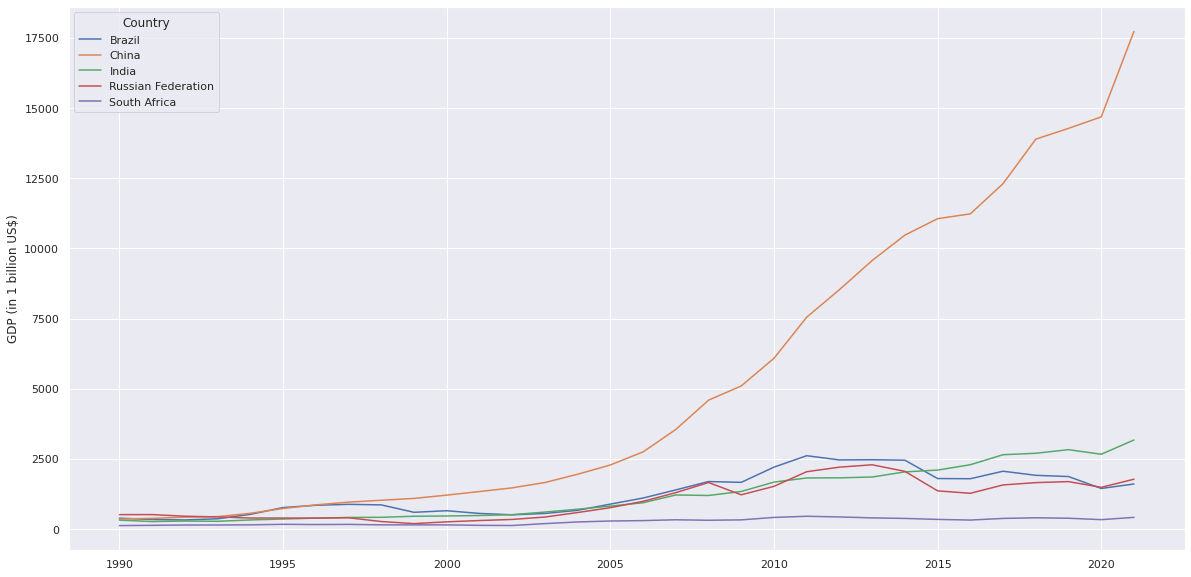

In [237]:
#Graph with BRINCS countries
gdp_current_dolar_graph.T.iloc[29:].plot(figsize=(20,10))
plt.ylabel('GDP (in 1 billion US$)')
plt.show()

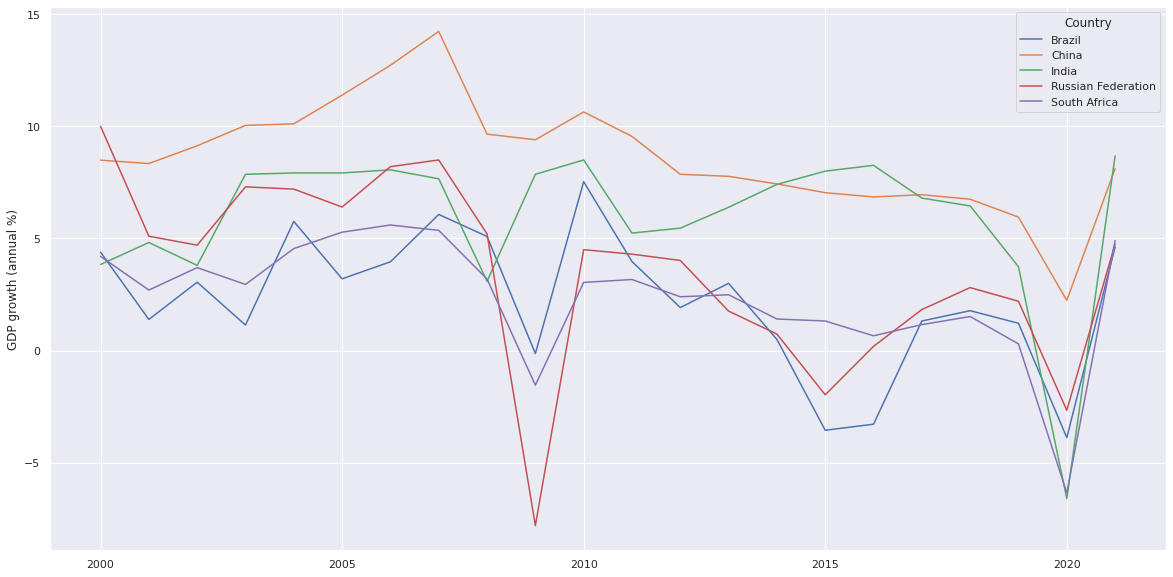

In [238]:
#Graph with BRINCS countries
brics_gdp_annual_variation_graph.T.iloc[39:].plot(figsize=(20,10))
plt.ylabel('GDP growth (annual %)')
plt.show()

**G20 Countries**

In [239]:
g20_countries_code = ['AUS', 'CAN', 'SAU', 'USA', 'IND',
                      'RUS', 'ZAF', 'TUR', 'ARG', 'BRA',
                      'MEX', 'FRA', 'DEU', 'ITA', 'GRB',
                      'CHN', 'IDN', 'JPN', 'KOR']

In [240]:
#REMINDER: Use '@' before a variable to use a list inside of a variable
g20_gdp_annual_variation = gdp_annual_variation.query("Code == @g20_countries_code")

In [241]:
#Creating a variable for G20 countries' GDP variation
g20_gdp_annual_variation_graph = g20_gdp_annual_variation
g20_gdp_annual_variation_graph = g20_gdp_annual_variation_graph.drop(columns=['Code', '1960'])

In [242]:
#Setting the countries names like index
g20_gdp_annual_variation_graph = g20_gdp_annual_variation_graph.set_index('Country')

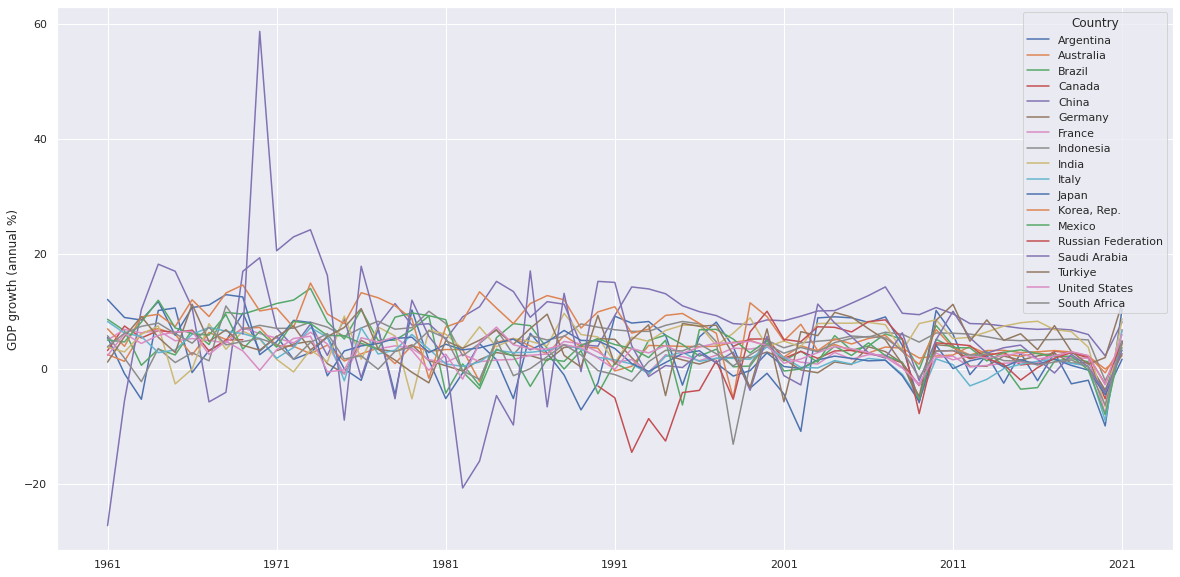

In [243]:
#Graph with all G20 Countries, bad graph
g20_gdp_annual_variation_graph.T.plot(figsize=(20,10))
plt.ylabel('GDP growth (annual %)')
plt.show()

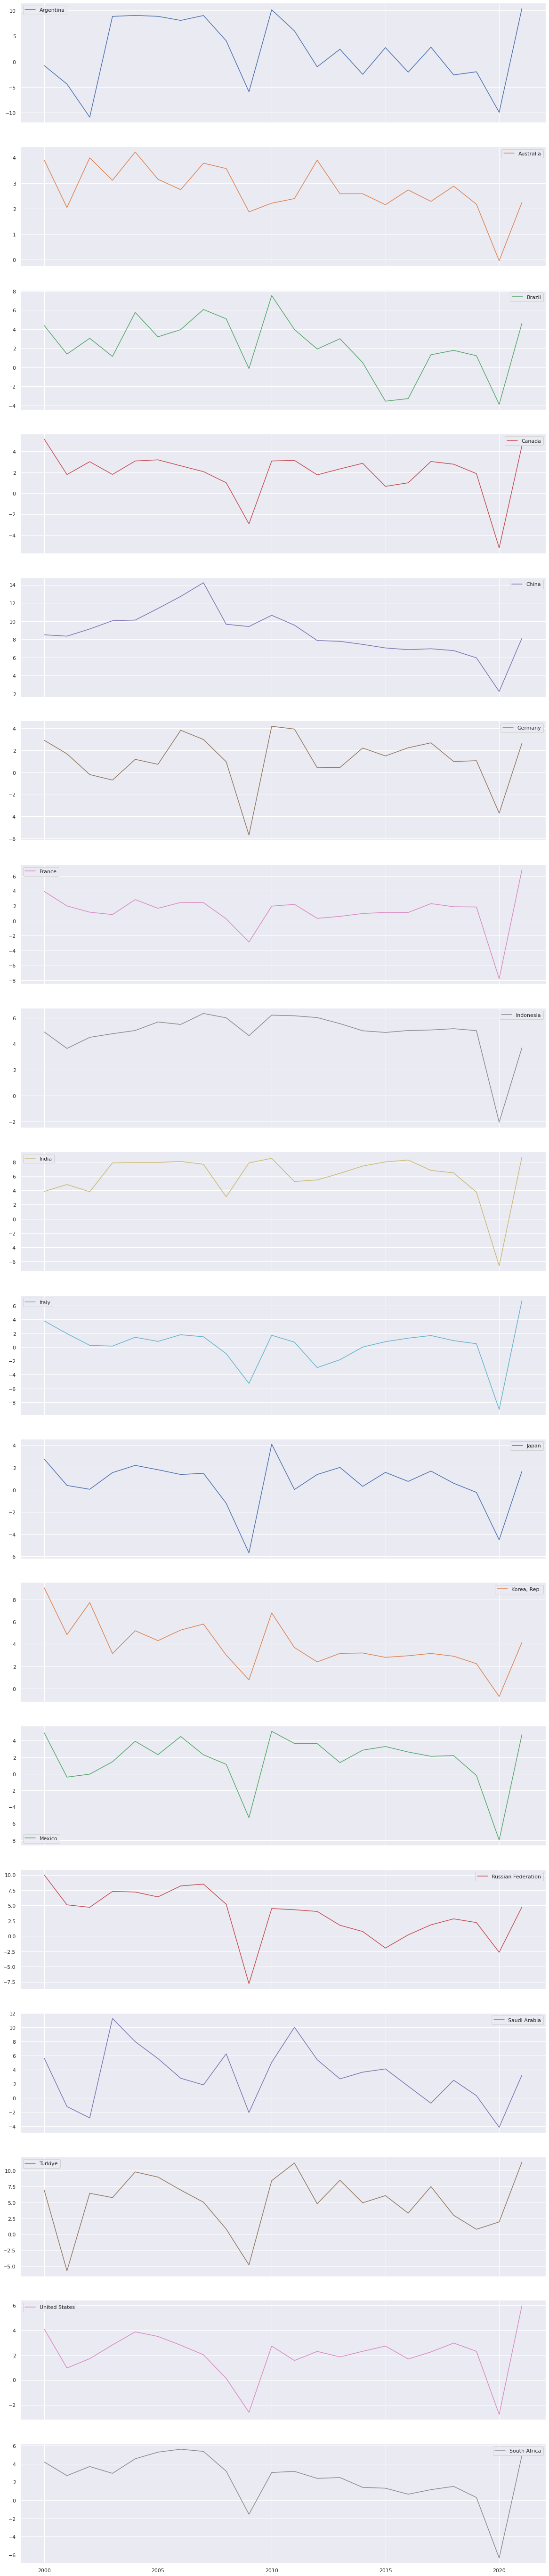

In [244]:
#Segment countries in subplots, better visualization of GDP variation of each country between 2000 and 2021
g20_gdp_annual_variation_graph.T.iloc[39:].plot(subplots=True, figsize=(20,100))
plt.show()